## Loan Prediction using Machine Learning


#### This ML task requires you to build a model that will classify how much loan the user can take. Columns that are available in train data are user’s marital status, education, number of dependents, and employments. The train data has a loan status column with Y or N values stating whether user can take loan amount specified or not.
 You can choose an algorithm to build this model. Kindly apply cross validation during training and state the features important in building the model.
Deliverables
csv output of predicted classification of test data
feature importance
train and test scores (mean score and standard deviation)

In [1]:
# importing basic packages
# Import the necessary pythonpackages that can help in building the model or plotting values
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [8]:
# reading input data
train_data = pd.read_csv("/Users/esthermensah/Downloads/ml-tasks-main/loan Prediction/./data/train_data.csv")
test_data = pd.read_csv("/Users/esthermensah/Downloads/ml-tasks-main/loan Prediction/./data/test_data.csv")

In [9]:
# understanding the data
train_data.shape, test_data.shape

((614, 13), (367, 12))

In [13]:
# Get the Columns Name from train dataset

train_data.columns, test_data.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [15]:
# printing the data types
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [17]:
# checking for missing data
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
# removing missing data
train1 = train_data.dropna()

In [24]:
train1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [21]:
test1 = test_data.dropna()

In [22]:
test1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Categorical Independent Variable vs Target Variable

##### Finding the relationship between target variable and categorical independent variables.

### Relationship between "Loan_Status" and "Gender"

Loan_Status    N    Y
Gender               
Female        32   54
Male         116  278


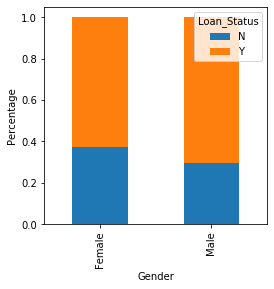

In [26]:
print(pd.crosstab(train1["Gender"],train1["Loan_Status"]))
Gender = pd.crosstab(train1["Gender"],train1["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

### Relationship between "Loan_Status" and "Married"



Loan_Status   N    Y
Married             
No           64  105
Yes          84  227


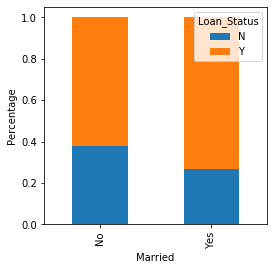

In [27]:
print(pd.crosstab(train1["Married"],train1["Loan_Status"]))
Married=pd.crosstab(train1["Married"],train1["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

### Relationship between "Loan_Status" and "Dependents"

Loan_Status   N    Y
Dependents          
0            87  187
1            28   52
2            20   65
3+           13   28


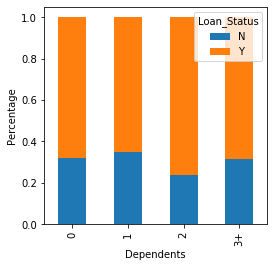

In [28]:
print(pd.crosstab(train1['Dependents'],train1["Loan_Status"]))
Dependents = pd.crosstab(train1['Dependents'],train1["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.show()

### Relationship between "Loan_Status" and "Education"

Loan_Status     N    Y
Education             
Graduate      112  271
Not Graduate   36   61


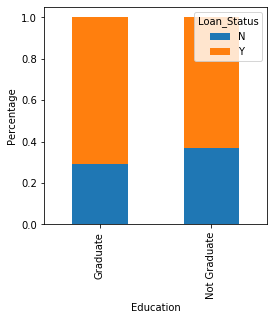

In [29]:
print(pd.crosstab(train1["Education"],train1["Loan_Status"]))
Education = pd.crosstab(train1["Education"],train1["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

### Relationship between "Loan_Status" and "Self_Employed"

Loan_Status      N    Y
Self_Employed          
No             125  289
Yes             23   43


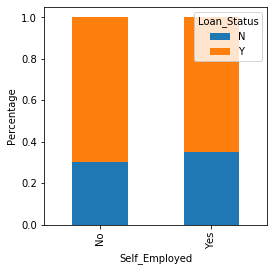

In [31]:
print(pd.crosstab(train["Self_Employed"],train["Loan_Status"]))
SelfEmployed = pd.crosstab(train["Self_Employed"],train["Loan_Status"])
SelfEmployed.div(SelfEmployed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")
plt.show()

In [40]:
test1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban


In [47]:
train1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [48]:
test1


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [50]:
test=test1.drop("Loan_ID",axis=1)

In [51]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
361,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [53]:
train1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [54]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban


In [57]:
print (train1.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [59]:
# making dummy variables for the categorical variables
train_df = pd.get_dummies(train,drop_first=True)


In [60]:

train_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1


In [61]:
test_df = pd.get_dummies(test,drop_first=True)
test_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1
5,2165,3422,152.0,360.0,1.0,1,1,0,0,0,1,1,0,1


In [62]:
X = train_df.drop(columns='Loan_Status_Y')
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1


In [63]:
X = train_df.drop(columns='Loan_Status_Y')
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1


In [64]:
y = train_df[['Loan_Status_Y']]
y.head(3)

,Loan_Status_Y
1,0
2,1
3,1


## Training the model

In [65]:
# import model to split the data
from sklearn.model_selection import train_test_split

In [66]:
# splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state =1)

In [67]:
# import algorithm to train the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [68]:
# training the model
logistic_model = LogisticRegression(random_state=1)
logistic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
pred = logistic_model.predict(X_test)

In [70]:
# calculating the accuracy of the model
pred_score = accuracy_score(pred,y_test)*100
pred_score

78.47222222222221

In [71]:
# predicting results of the test data
pred_test = logistic_model.predict(test_df)

In [72]:
# saving output to csv
test_csv = pd.DataFrame(pred_test)
test_csv.to_csv('file.csv',index=False)

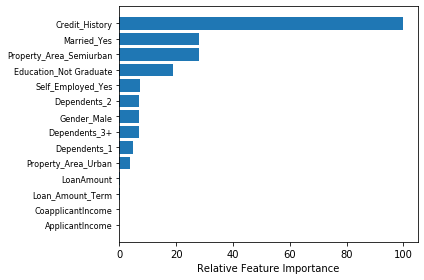

In [73]:
feature_importance = abs(logistic_model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()